In [2]:
from sklearn import datasets
import numpy as np
import torch
import datetime
import matplotlib.pyplot as plt

In [3]:
dataSet = datasets.load_iris()

In [ ]:
map = torch.rand((20, 20, 4))
data = torch.FloatTensor(dataSet.data)
data

In [104]:
lr = 0.01
map = torch.rand((20, 20, 4))
for epoch in range(1000):
  for j in range(len(data)):
    distances = (data[j].apply_(abs) + map.apply_(abs)).sum(axis=2)
    minimumDistanceIndex = [minimumsFromColumns[0].data.item(), 0]
    minimumsFromColumns = torch.argmin(distances, dim= 0)
    minimumsFromRows = torch.argmin(distances, dim= 1)

    for i in range(len(minimumsFromColumns)):
        if distances[minimumsFromColumns[i]][i] < distances[minimumDistanceIndex[0]][minimumDistanceIndex[1]]:
          minimumDistanceIndex = [minimumsFromColumns[i].data.item(), i]

    for i in range(len(minimumsFromRows)):
        if distances[i][minimumsFromRows[i]] < distances[minimumDistanceIndex[0]][minimumDistanceIndex[1]]:
          minimumDistanceIndex = [i, minimumsFromRows[i].data.item()]
    map[minimumDistanceIndex[0]][minimumDistanceIndex[1]] += lr * (data[j] - map[minimumDistanceIndex[0]][minimumDistanceIndex[1]])
    leftX = minimumDistanceIndex[0] - 1
    if leftX >= 0:
      map[leftX][minimumDistanceIndex[1]] += lr * 0.5 * (data[j] - map[minimumDistanceIndex[0]][minimumDistanceIndex[1]])
    rightX = minimumDistanceIndex[0] + 1
    if rightX < map.shape[0]:
      map[rightX][minimumDistanceIndex[1]] += lr * 0.5 * (data[j] - map[minimumDistanceIndex[0]][minimumDistanceIndex[1]])
    topY = minimumDistanceIndex[1] - 1
    if topY >= 0:
      map[minimumDistanceIndex[0]][topY] += lr * 0.5 * (data[j] - map[minimumDistanceIndex[0]][minimumDistanceIndex[1]])
    bottomY = minimumDistanceIndex[1] + 1
    if bottomY < map.shape[0]:
      map[minimumDistanceIndex[0]][bottomY] += lr * 0.5 * (data[j] - map[minimumDistanceIndex[0]][minimumDistanceIndex[1]])
  print("Epoch " + str(epoch +1) + " " + str(datetime.datetime.now()))

Epoch 1 2020-11-24 06:18:09.566462
Epoch 2 2020-11-24 06:18:09.720786
Epoch 3 2020-11-24 06:18:09.876575
Epoch 4 2020-11-24 06:18:10.029737
Epoch 5 2020-11-24 06:18:10.188864
Epoch 6 2020-11-24 06:18:10.347953
Epoch 7 2020-11-24 06:18:10.500815
Epoch 8 2020-11-24 06:18:10.657951
Epoch 9 2020-11-24 06:18:10.815508
Epoch 10 2020-11-24 06:18:10.966382
Epoch 11 2020-11-24 06:18:11.171335
Epoch 12 2020-11-24 06:18:11.328957
Epoch 13 2020-11-24 06:18:11.481403
Epoch 14 2020-11-24 06:18:11.629418
Epoch 15 2020-11-24 06:18:11.781658
Epoch 16 2020-11-24 06:18:11.930159
Epoch 17 2020-11-24 06:18:12.084755
Epoch 18 2020-11-24 06:18:12.234834
Epoch 19 2020-11-24 06:18:12.405325
Epoch 20 2020-11-24 06:18:12.554075
Epoch 21 2020-11-24 06:18:12.707320
Epoch 22 2020-11-24 06:18:12.855807
Epoch 23 2020-11-24 06:18:13.014619
Epoch 24 2020-11-24 06:18:13.169534
Epoch 25 2020-11-24 06:18:13.322581
Epoch 26 2020-11-24 06:18:13.480505
Epoch 27 2020-11-24 06:18:13.636858
Epoch 28 2020-11-24 06:18:13.794768
E

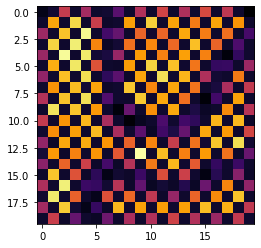

In [105]:
plt.imshow(map[:,:,2], cmap='inferno', interpolation="nearest")